In [129]:
import pandas as pd
from scipy import stats

In [130]:
def annotate(ax):
  """Annotate the height of each bar in the plot."""
  for p in ax.patches:
    ax.annotate("%.2fs" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


def annotate_x_times_faster(ax, x_times_list):
  """Annotate how many times faster is a processing tool per operation in the plot."""
  num_ops = len(x_times_list)
  for i, p in enumerate(ax.patches):
    if i < num_ops:
      ax.annotate("%.1fx" % x_times_list[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(4, 10), textcoords='offset points', fontsize=8, weight='bold', color="#585858")

In [131]:
df = pd.read_csv('distributed_benchmark_20250510_140935.csv')
df = df.set_index('task')
df.head(10)

,joblib,koalas,modin,spark,dask
task,,,,,
local read file,9.503164e-01,0.184652,1.759276,0.076203,0.005472
local count,8.106232e-06,1.193924,0.000098,0.171463,0.018379
local count index length,7.152557e-07,0.251540,0.000027,0.145712,0.040877
local mean,7.152557e-07,0.775800,0.205608,0.168990,0.105408
local standard deviation,7.152557e-07,0.405869,0.097779,0.204147,0.126612
local mean of columns addition,7.152557e-07,0.445795,0.135887,0.215397,0.156739
local addition of columns,7.152557e-07,0.036931,0.079214,0.010026,0.203774
local mean of columns multiplication,9.536743e-07,0.381140,0.158187,0.223162,0.162075
local multiplication of columns,9.536743e-07,0.022352,0.026135,0.010992,0.172233


In [132]:
df.index = map(
    lambda s: s.replace("filtered ", "")
      .replace("cache ", "")
      .replace("local ", "")
      .replace("of columns", "of series")
      .replace("addition of series", "series addition")
      .replace("multiplication of series", "series multiplication")
      .replace("arithmetic ops", "arithmetic")
      .replace("count index length", "count index"),
    df.index)
df.head(50)

,joblib,koalas,modin,spark,dask
read file,9.503164e-01,0.184652,1.759276,0.076203,0.005472
count,8.106232e-06,1.193924,0.000098,0.171463,0.018379
count index,7.152557e-07,0.251540,0.000027,0.145712,0.040877
mean,7.152557e-07,0.775800,0.205608,0.168990,0.105408
standard deviation,7.152557e-07,0.405869,0.097779,0.204147,0.126612
mean of series addition,7.152557e-07,0.445795,0.135887,0.215397,0.156739
series addition,7.152557e-07,0.036931,0.079214,0.010026,0.203774
mean of series multiplication,9.536743e-07,0.381140,0.158187,0.223162,0.162075
series multiplication,9.536743e-07,0.022352,0.026135,0.010992,0.172233
value counts,4.768372e-07,0.109263,0.203893,0.006512,0.238517


In [133]:
standard_ops = df.iloc[:15]
ops_with_filtering = df.iloc[15:30]
ops_with_filtering_and_cache = df.iloc[30:]

standard_ops.head(15)

,joblib,koalas,modin,spark,dask
read file,9.503164e-01,0.184652,1.759276,0.076203,0.005472
count,8.106232e-06,1.193924,0.000098,0.171463,0.018379
count index,7.152557e-07,0.251540,0.000027,0.145712,0.040877
mean,7.152557e-07,0.775800,0.205608,0.168990,0.105408
standard deviation,7.152557e-07,0.405869,0.097779,0.204147,0.126612
mean of series addition,7.152557e-07,0.445795,0.135887,0.215397,0.156739
series addition,7.152557e-07,0.036931,0.079214,0.010026,0.203774
mean of series multiplication,9.536743e-07,0.381140,0.158187,0.223162,0.162075
series multiplication,9.536743e-07,0.022352,0.026135,0.010992,0.172233
value counts,4.768372e-07,0.109263,0.203893,0.006512,0.238517


Preparation

Standard operations

Text(0, 0.5, 'Elapsed time (sec)')

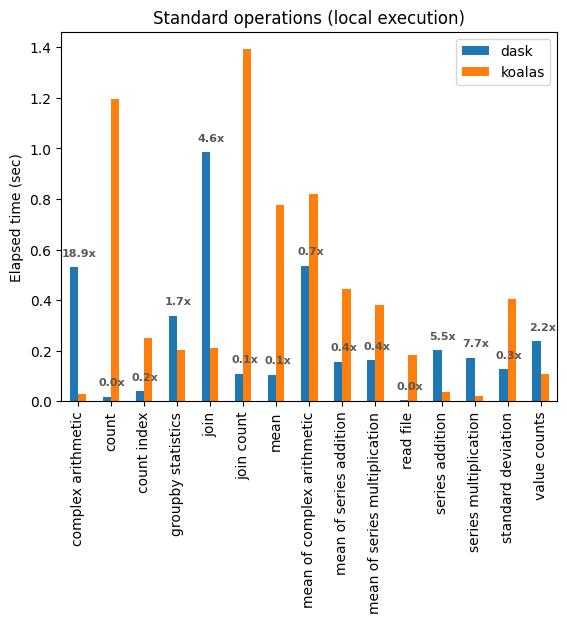

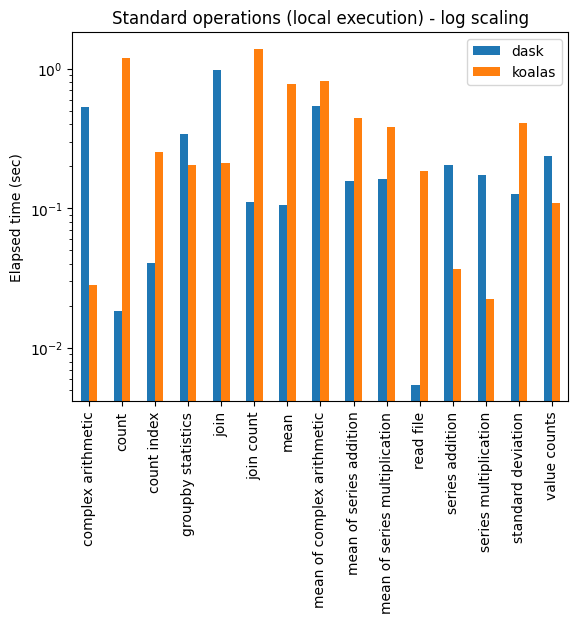

In [136]:
selected_columns = ['dask', 'koalas']
standard_ops_koalas_and_dask = standard_ops[selected_columns]
plot_title = 'Standard operations (local execution)'
ax = standard_ops_koalas_and_dask.sort_index().plot.bar(title=plot_title)
ax.set_ylabel("Elapsed time (sec)")

tmp_df_x_times_faster = standard_ops_koalas_and_dask.sort_index().copy()

tmp_df_x_times_faster['dask / koalas'] = tmp_df_x_times_faster.dask / tmp_df_x_times_faster.koalas
tmp_df_x_times_faster['koalas / dask'] = tmp_df_x_times_faster.koalas / tmp_df_x_times_faster.dask
annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['dask / koalas'].to_list())
#annotate_x_times_faster(ax, x_times_list=tmp_df_x_times_faster['koalas / dask'].to_list())

standard_ops_koalas_and_dask.sort_index().plot.bar(logy=True, title='%s - log scaling' % plot_title).set_ylabel("Elapsed time (sec)")

In [137]:
tmp_df_x_times_faster

,dask,koalas,dask / koalas,koalas / dask
complex arithmetic,0.531947,0.028120,18.916834,0.052863
count,0.018379,1.193924,0.015394,64.960552
count index,0.040877,0.251540,0.162507,6.153596
groupby statistics,0.338567,0.203237,1.665868,0.600288
join,0.984885,0.212375,4.637485,0.215634
join count,0.110141,1.391837,0.079133,12.636887
mean,0.105408,0.775800,0.135871,7.359943
mean of complex arithmetic,0.536917,0.820670,0.654243,1.528485
mean of series addition,0.156739,0.445795,0.351595,2.844183
mean of series multiplication,0.162075,0.381140,0.425238,2.351627


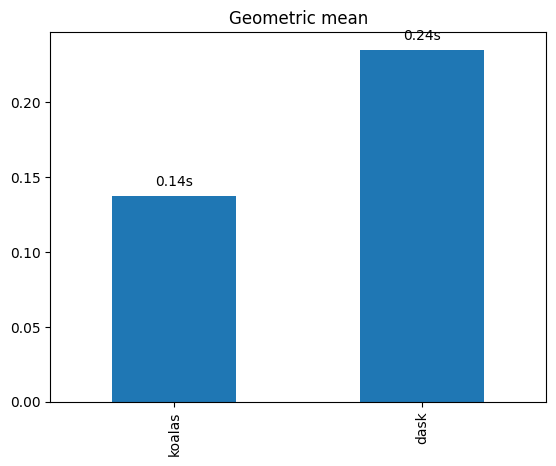

In [138]:
annotate(pd.Series(stats.gmean(standard_ops_koalas_and_dask[['dask', 'koalas']]), index=['koalas', 'dask']).plot.bar(title='Geometric mean'))


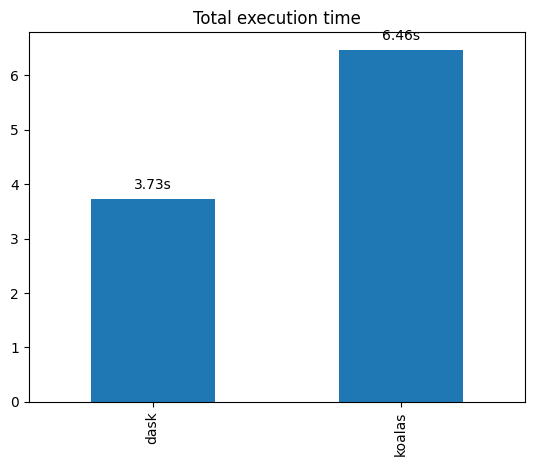

In [139]:
annotate(standard_ops_koalas_and_dask[['dask', 'koalas']].sum().plot.bar(title='Total execution time'))

In [142]:
print("Performance diff %% (simple avg): %s" % (sum(standard_ops_koalas_and_dask.dask / standard_ops_koalas_and_dask.koalas) / len(standard_ops_koalas_and_dask)))
print("Performance diff %% (geomean): %s" % stats.gmean(standard_ops_koalas_and_dask.dask / standard_ops_koalas_and_dask.koalas))


arithmetic_ops = standard_ops_koalas_and_dask.filter(items=['complex arithmetic', 'series multiplication', 'series addition'], axis=0)
print("Performance diff (arthemetic) %% (simple avg): %s" % (sum(arithmetic_ops.dask / arithmetic_ops.koalas) / len(arithmetic_ops)))
print("Performance diff (arthemetic) %% (geomean): %s" % stats.gmean(arithmetic_ops.dask / arithmetic_ops.koalas))

basic_stats_ops = standard_ops_koalas_and_dask.filter(items=['count', 'mean', 'standard deviation', 'count index', 'join', 'join count'], axis=0)
print("Performance diff (basic stats) %% (simple avg): %s" % (sum(basic_stats_ops.dask / basic_stats_ops.koalas) / len(basic_stats_ops)))
print("Performance diff (basic stats) %% (geomean): %s" % stats.gmean(basic_stats_ops.dask / basic_stats_ops.koalas))

Performance diff % (simple avg): 2.852793090119088
Performance diff % (geomean): 0.5859935846666778
Performance diff (arthemetic) % (simple avg): 10.713338310775113
Performance diff (arthemetic) % (geomean): 9.299706803905925
Performance diff (basic stats) % (simple avg): 0.890390607965049
Performance diff (basic stats) % (geomean): 0.18408281446088928


Overall


In [28]:
overall_df = pd.concat([standard_ops, ops_with_filtering, ops_with_filtering_caching])
print("Total performance diff %% (simple avg): %s" % (sum(overall_df.dask / overall_df.koalas) / len(overall_df)))
print("Total performance diff %% (geomean): %s" % stats.gmean(overall_df.dask / overall_df.koalas))

NameError: name 'standard_ops' is not defined